In [2]:
!pip install plotly.express
!pip install emoji
!pip install nltk
!pip install wordcloud
!pip install scikit-learn
!pip install imbalanced-learn
!pip install -U scikit-learn
!pip install transformers
!pip install torch



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [6 lines of output]
  
  Cargo, the Rust package manager, is not installed or is not on PATH.
  This package requires Rust and Cargo to compile extensions. Install it through
  the system's package manager or via https://rustup.rs/
  
  Checking for Rust toolchain....
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Core Libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
from string import punctuation
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

# Utility
import pickle


In [4]:
df = pd.read_csv('cyberbullying_tweets.csv')
print(df)

                                              tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]


In [5]:
df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [6]:
df.shape

(47692, 2)

In [7]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [8]:
df.describe(include="all")

,tweet_text,cyberbullying_type
count,47692,47692
unique,46006,6
top,#NAME?,religion
freq,12,7998


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [10]:
 df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [11]:
df['tweet_text'].duplicated().sum()

np.int64(1686)

In [12]:
df.drop_duplicates('tweet_text', inplace=True, ignore_index=True)
df['tweet_text'].duplicated().sum()

np.int64(0)

In [13]:
df.cyberbullying_type.value_counts()

cyberbullying_type
religion               7994
age                    7989
ethnicity              7951
not_cyberbullying      7937
gender                 7895
other_cyberbullying    6240
Name: count, dtype: int64

<Axes: xlabel='cyberbullying_type'>

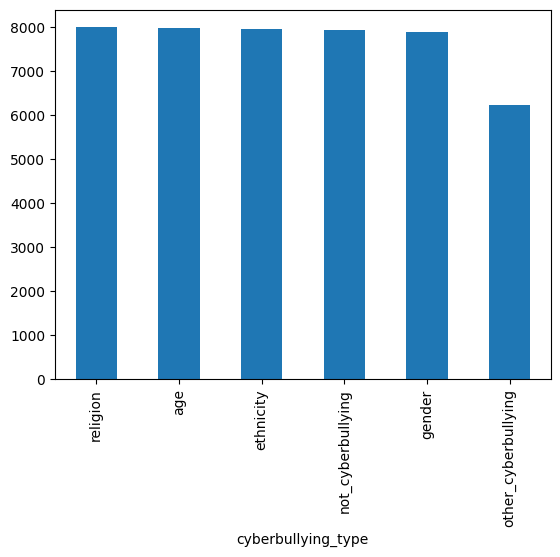

In [14]:
df.cyberbullying_type.value_counts().plot(kind="bar")

In [15]:
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [16]:
df = df[df["cyberbullying_type"] != "other_cyberbullying"]
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity'],
      dtype=object)

In [17]:
df['sentiment_encoded']=df['cyberbullying_type'].replace(
    {
        'not_cyberbullying':0, 'gender':1, 'religion':2, 'age':3, 'ethnicity':4
    })

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stopwords_list = stopwords.words('english')
additional_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's']   # Specific to twitter lingo
stopwords_list.extend(additional_stopwords)
lemmatizer = WordNetLemmatizer() 

#### Preprocessing of text


def decontract(tweet):
    tweet=re.sub(r"cant\'t'","can not", tweet)
    tweet = re.sub(r"n\'t","not", tweet)
    tweet = re.sub(r"\'re", "are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would", tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", "have", tweet)
    tweet = re.sub(r"\'m", "am", tweet)
    return tweet

def remove_mult_spaces(tweet):
    return re.sub(r"\s\s+" , " ",tweet)


In [22]:
def remove_usernames(tweet):
    words = tweet.strip().split()
    words = [word for word in words if word[0]!='@']
    return ' '.join(words)

def remove_hashtags(tweet):
    words = tweet.strip().split()
    words = [word for word in words if word[0]!='#']
    return ' '.join(words)

def remove_links(tweet):
    words = tweet.strip().split()
    words = [word for word in words if word[:4]!='http']
    return ' '.join(words) 

def remove_punctuation(tweet):
    for mark in punctuation:
        tweet = tweet.replace(mark, '')
    return tweet

def convert_lowercase(tweet):
    return tweet.lower()

def tokenization(tweet):
    return word_tokenize(tweet)

def remove_stopwords(tok_tweet):
    res = []
    for word in tok_tweet:
        if word not in stopwords_list:
            res.append(word)
    return res

def lemmatize_words(tok_tweet):
    res = []
    for word in tok_tweet:
        res.append(lemmatizer.lemmatize(word))
    return res

In [23]:
# Defining a custom tweet cleaning function
#tweet = decontract(tweet)
#tweet = remove_mult_spaces(tweet)
def pre_processing_custom(tweet):
    tweet = remove_usernames(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_links(tweet)
    tweet = remove_punctuation(tweet)
    tweet = convert_lowercase(tweet)
    tok_tweet = tokenization(tweet)
    tok_tweet = remove_stopwords(tok_tweet)
    tok_tweet = lemmatize_words(tok_tweet)
    clean_tweet = ' '.join(tok_tweet)

    return clean_tweet

In [24]:
df['cleaned_text'] = df['tweet_text'].map(pre_processing_custom)
df.head(5)

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...


In [25]:
!pip install tweet-preprocessor
import preprocessor as p

In [26]:
def clean_tweets(tweet):
    tweet = p.clean(tweet)
    return tweet

In [27]:
# Defining the better cleaning function
def pre_processing(tweet):
    tweet = clean_tweets(tweet)
    tweet = remove_punctuation(tweet)
    tweet = convert_lowercase(tweet)
    tok_tweet = tokenization(tweet)
    tok_tweet = remove_stopwords(tok_tweet)
    tok_tweet = lemmatize_words(tok_tweet)
    clean_tweet = ' '.join(tok_tweet)

    return clean_tweet

In [28]:
# Clean tweets
df['cleaned_text'] = df['tweet_text'].map(pre_processing)
df.head(5)

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...


In [29]:
## Removing duplicates

df['cleaned_text'].duplicated().sum()

np.int64(1216)

In [30]:
df.drop_duplicates('cleaned_text', inplace=True, ignore_index=True)
df['cleaned_text'].duplicated().sum()

np.int64(0)

In [31]:
df.shape

(38550, 4)

In [32]:
# Total word count of a tweet
df['word_count'] = df['tweet_text'].map(lambda x: len(x.split()))
df.sample(5)

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count
35017,Lol no thanks I don't swing that way RT @ObIuh...,ethnicity,4,lol thanks dont swing way fuck dumb nigger bit...,19
37397,@drexmcxtch — first impression: very cute — a ...,ethnicity,4,first impression cute nickname id give clorox ...,58
21957,@KapilMishra_IND Ur campaign is globally uniti...,religion,2,campaign globally uniting hindu giving voice i...,23
411,@DannyVelasco @philippenis Just like the moon ...,not_cyberbullying,0,like moon landing,7
35314,"imagine cuddling to ur bf's chest, tonight &am...",ethnicity,4,imagine cuddling bfs chest tonight amp wrappin...,56


In [33]:
# Average word length of a tweet
def avg_word_length(tweet):
    words = tweet.split()
    word_count = len(words)
    word_length = 0
    for word in words:
        word_length += len(word)
    avg_length = round(word_length / word_count,2)
    return avg_length

df['avg_word_length'] = df['tweet_text'].map(avg_word_length)
df.sample(5)

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length
7815,@IsabellaEscort When I ask them that verbatim ...,gender,1,ask verbatim question call abusive misogynist ...,22,5.05
38096,Where’s the difference in you calling black pe...,ethnicity,4,wheres difference calling black people coon ca...,20,5.05
8927,"@Nah_I_Doubt_It fine, but i swear if you call ...",gender,1,fine swear call anyone gay make rape joke make...,21,4.90
37661,"niggers are those who are igrant dumb fucks, w...",ethnicity,4,nigger igrant dumb fuck belive smart really th...,25,4.64
28569,It’s the fact that all through middle school l...,age,3,fact middle school little white girl use call ...,35,4.46


In [34]:
df = df[df['word_count']>3]
df = df[df['word_count']<100]
df.reset_index(drop=True, inplace=True)
df.shape

(38193, 6)

##### Tokenization column

In [35]:
df['tweet_list']=df['cleaned_text'].apply(word_tokenize)
df.head()

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious,9,5.89,"[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white,14,7.29,[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake,9,5.78,"[classy, whore, red, velvet, cupcake]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...,18,4.72,"[meh, thanks, head, concerned, another, angry,..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...,18,4.72,"[isi, account, pretending, kurdish, account, l..."


In [36]:
text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)
df['text_len']=text_len
df.head()

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word food crapilicious,9,5.89,"[word, food, crapilicious]",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white,14,7.29,[white],1
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcake,9,5.78,"[classy, whore, red, velvet, cupcake]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,meh thanks head concerned another angry dude t...,18,4.72,"[meh, thanks, head, concerned, another, angry,...",8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isi account pretending kurdish account like is...,18,4.72,"[isi, account, pretending, kurdish, account, l...",8


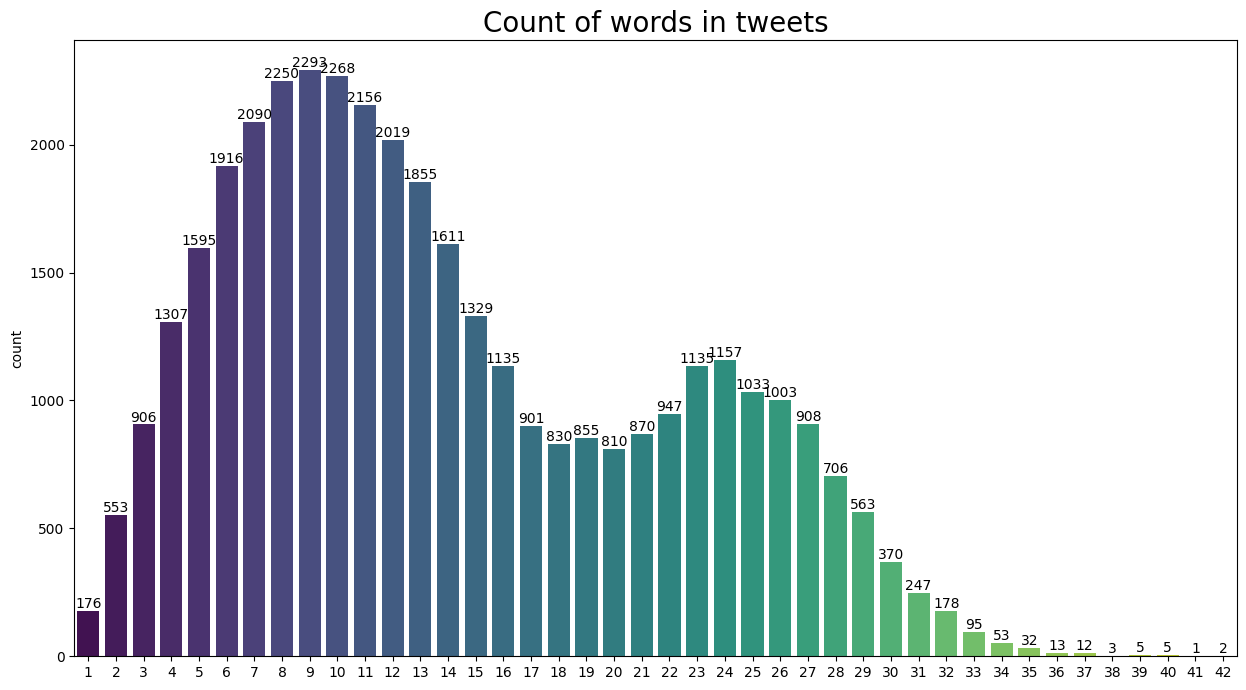

In [37]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=df, palette = 'viridis')
plt.title('Count of words in tweets',fontsize=20)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [38]:
## word cloud function

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.cyberbullying_type == cyberbullying_type].cleaned_text.values:
        string = string + " "+i.strip()
        #custom_mask = mp.array(Image.open("image location"))
        #mask_colors = ImageColorGenerator(custom_mask)
    wordcloud = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(string)


    # WordCloud Image generation
    plt.figure(figsize = (10,10), facecolor = None)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [39]:
not_cyberbullying_type = df[df['cyberbullying_type']=='not_cyberbullying']
gender_type = df[df['cyberbullying_type']=='gender']
religion_type = df[df['cyberbullying_type']=='religion']
age_type = df[df['cyberbullying_type']=='age']
ethnicity_type = df[df['cyberbullying_type']=='ethnicity']

In [40]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words', 'Count']
top20_gender.style.background_gradient(cmap='Reds')

,Top Words,Count
0,joke,5048
1,rape,3880
2,gay,3766
3,bitch,1124
4,call,1103
5,female,1101
6,woman,1100
7,people,982
8,sexist,940
9,like,923


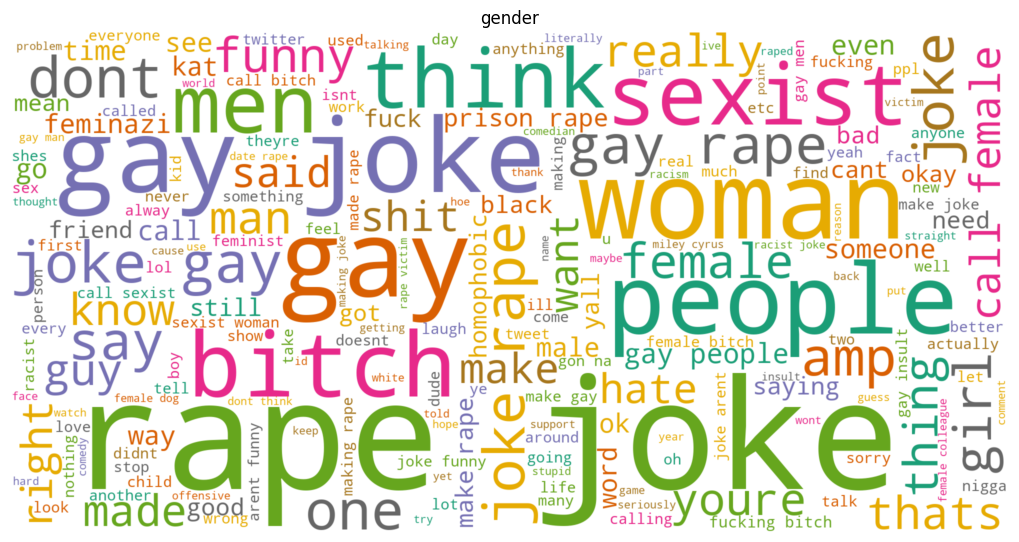

In [41]:
plot_wordcloud('gender')

In [42]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words', 'Count']
top20_religion.style.background_gradient(cmap='Reds')

,Top Words,Count
0,muslim,4581
1,idiot,3035
2,christian,2024
3,terrorist,1325
4,right,1285
5,like,1243
6,islamic,1234
7,woman,1222
8,dont,1190
9,terrorism,1093


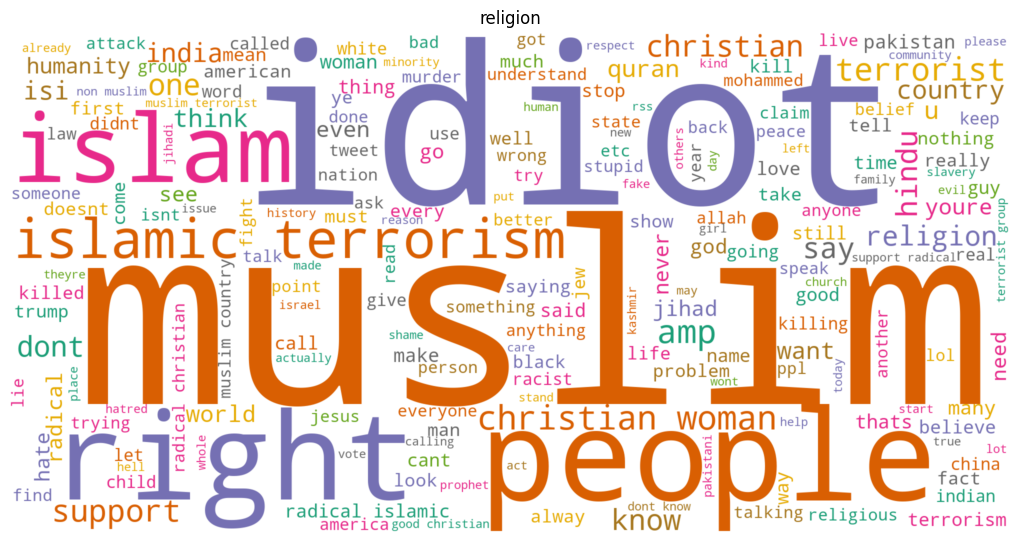

In [43]:
plot_wordcloud('religion')

In [44]:
age= Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top20_age = pd.DataFrame(age.most_common(20))
top20_age.columns = ['Top Words', 'Count']
top20_age.style.background_gradient(cmap='Reds')

,Top Words,Count
0,school,8381
1,high,4852
2,girl,4610
3,bullied,4322
4,bully,4226
5,like,1877
6,one,1042
7,people,933
8,got,839
9,kid,803


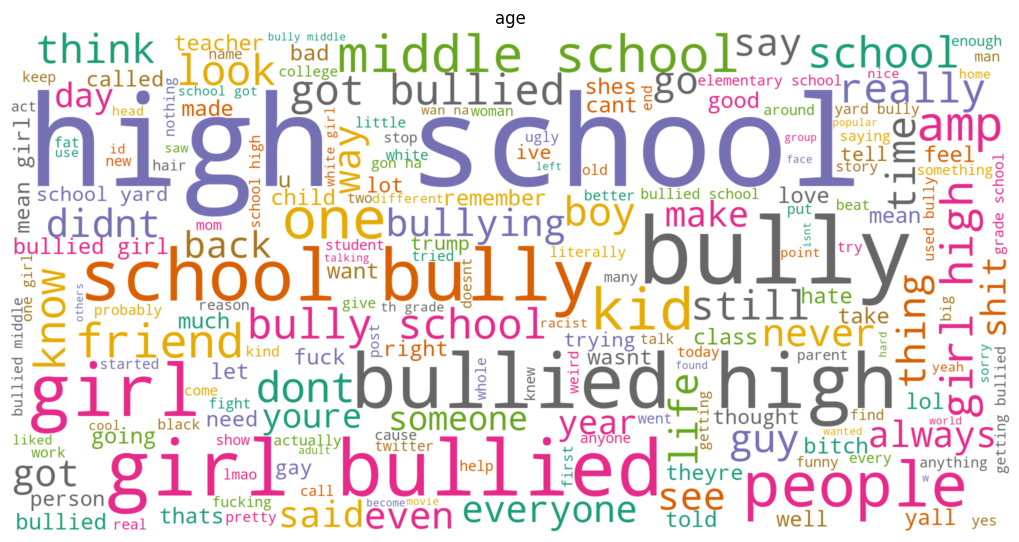

In [45]:
plot_wordcloud('age')

In [46]:
## Ethnicity
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))
top20_ethnicity.columns = ['Top Words', 'Count']
top20_ethnicity.style.background_gradient(cmap='Reds')

,Top Words,Count
0,nigger,5311
1,fuck,5137
2,dumb,4896
3,as,2157
4,black,2111
5,white,1530
6,people,1174
7,one,1052
8,obama,1042
9,like,1006


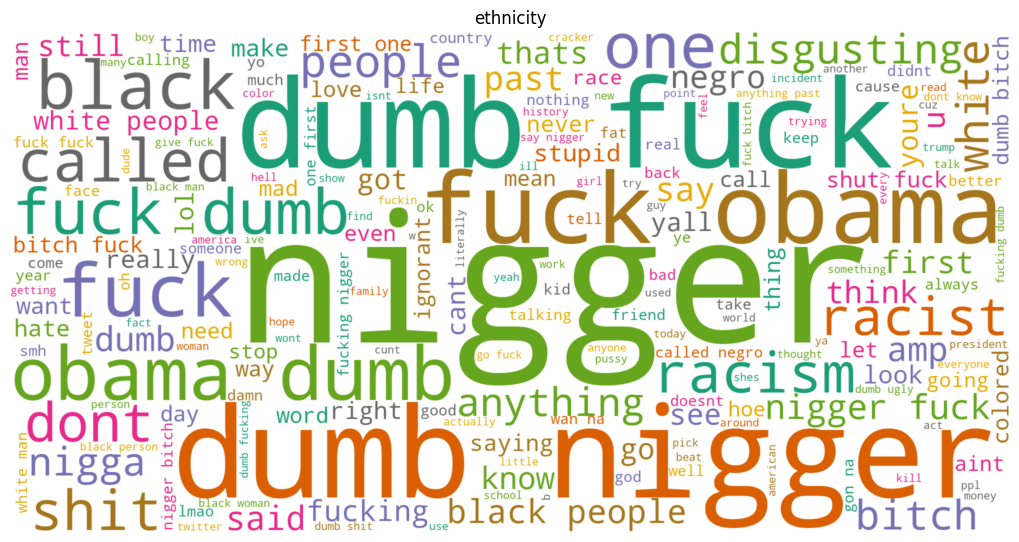

In [47]:
plot_wordcloud('ethnicity')

In [48]:
from collections import Counter   # To count the frequency of each word

temp=[]
for tweet in df['cleaned_text']:
  for word in tweet.split():
    temp.append(word)
vocab = Counter(temp)
print("Vocabulary Size:", len(vocab))
print(list(vocab.items())[:5])

Vocabulary Size: 38472
[('word', 867), ('food', 128), ('crapilicious', 1), ('white', 2213), ('classy', 29)]


In [49]:
common_word=[]
freq=[]
for i, j in vocab.most_common()[:10]:
  common_word.append(i)
  freq.append(j)

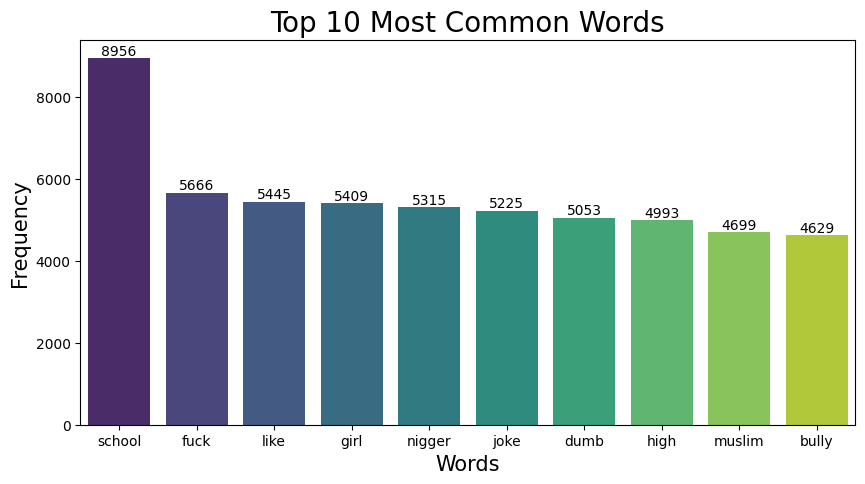

In [50]:
# Bar Plot with Number Labels for All Bars
plt.figure(figsize=(10, 5))  # Set the figure size
ax = sns.barplot(x=common_word, y=freq, palette='viridis')  # Create the barplot

# Title and axis labels
plt.title('Top 10 Most Common Words', size=20)
plt.ylabel("Frequency", size=15)
plt.xlabel("Words", size=15)

# Adding number labels to all bars
for container in ax.containers:  # Loop through all the containers (bars)
    ax.bar_label(container, label_type='edge')  # Add labels to the edge of bars

# Adding grid for better readability
plt.show()  # Display the plot


In [51]:
df.tail()

,tweet_text,cyberbullying_type,sentiment_encoded,cleaned_text,word_count,avg_word_length,tweet_list,text_len
38188,"Black ppl aren't expected to do anything, depe...",ethnicity,4,black ppl arent expected anything depended any...,42,4.60,"[black, ppl, arent, expected, anything, depend...",22
38189,Turner did not withhold his disappointment. Tu...,ethnicity,4,turner withhold disappointment turner called c...,45,5.16,"[turner, withhold, disappointment, turner, cal...",29
38190,I swear to God. This dumb nigger bitch. I have...,ethnicity,4,swear god dumb nigger bitch got bleach hair re...,20,4.25,"[swear, god, dumb, nigger, bitch, got, bleach,...",13
38191,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,4,yea fuck youre nigger fucking unfollow fucking...,15,5.07,"[yea, fuck, youre, nigger, fucking, unfollow, ...",9
38192,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,4,bro got ta chill dog fuck kp dumb nigger bitch...,14,4.50,"[bro, got, ta, chill, dog, fuck, kp, dumb, nig...",11


In [52]:
X = df['cleaned_text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=76)

In [53]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(30554,) (30554,) (7639,) (7639,)


In [54]:
sentiments = ["not_cyberbullying", "gender", "religion", "age", "ethnicity"]

 **TF-IDF Vectorization**

In [55]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train)    # Fit on train
print("No. of feature words:", len(tfidf.get_feature_names_out()))

No. of feature words: 292253


In [56]:
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(f"{X_train_tf.shape = }\n{X_test_tf.shape = }")

X_train_tf.shape = (30554, 292253)
X_test_tf.shape = (7639, 292253)


###### Trying different models

In [57]:
# Model training
# Experiment with different values of C (regularization strength)
lr = LogisticRegression(solver='saga', penalty='l2',random_state=394)
lr.fit(X_train_tf, y_train)


LogisticRegression(random_state=394, solver='saga')

In [58]:
# Model prediction
y_pred_train = lr.predict(X_train_tf)
y_pred_test = lr.predict(X_test_tf)

In [59]:
# Model evaluation
print('\tClassification Report for Logistic Regression on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Logistic Regression on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

	Classification Report for Logistic Regression on Train

                    precision    recall  f1-score   support

not_cyberbullying       0.88      0.95      0.91      5815
           gender       0.98      0.91      0.95      5955
         religion       0.98      0.98      0.98      6349
              age       0.98      0.99      0.98      6289
        ethnicity       0.99      0.99      0.99      6146

         accuracy                           0.96     30554
        macro avg       0.96      0.96      0.96     30554
     weighted avg       0.96      0.96      0.96     30554


	Classification Report for Logistic Regression on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.80      0.79      0.79      1454
           gender       0.93      0.83      0.88      1489
         religion       0.94      0.95      0.95      1587
              age       0.92      0.99      0.95      1573
        ethnicity       0.96      0.99      0.97      

Text(0.5, 1.0, 'Confusion Matrix LR')

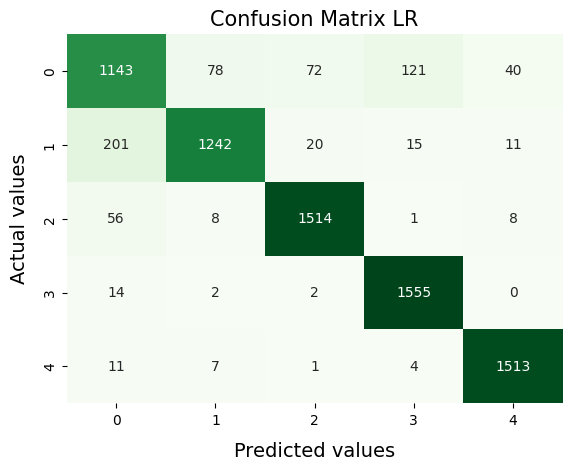

In [60]:
# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix LR', size=15)

In [61]:

mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_tf, y_train)

MultinomialNB(alpha=0.1)

In [62]:

y_pred_train = mnb.predict(X_train_tf)
y_pred_test = mnb.predict(X_test_tf)

In [63]:
# Model evaluation
print('\tClassification Report for Naive-Bayes\' on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Naive-Bayes\' on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

	Classification Report for Naive-Bayes' on Train

                    precision    recall  f1-score   support

not_cyberbullying       1.00      0.97      0.99      5815
           gender       1.00      0.99      0.99      5955
         religion       0.99      1.00      0.99      6349
              age       0.99      1.00      0.99      6289
        ethnicity       0.99      1.00      1.00      6146

         accuracy                           0.99     30554
        macro avg       0.99      0.99      0.99     30554
     weighted avg       0.99      0.99      0.99     30554


	Classification Report for Naive-Bayes' on Test

                    precision    recall  f1-score   support

not_cyberbullying       0.87      0.47      0.61      1454
           gender       0.86      0.82      0.84      1489
         religion       0.83      0.97      0.90      1587
              age       0.79      0.98      0.87      1573
        ethnicity       0.89      0.94      0.92      1536

        

Text(0.5, 1.0, 'Confusion Matrix NB')

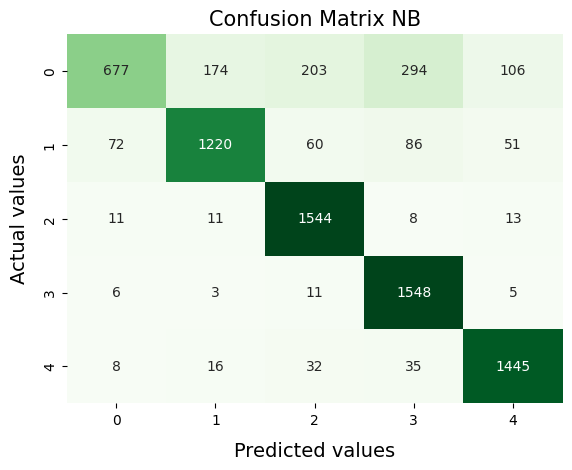

In [64]:
# Confusion Matrix '
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix NB', size=15)

#### ***Random Forest***

In [65]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=30, random_state=27)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, random_state=27)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, 50]
}

# Use GridSearchCV with parallel processing
model = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)
model.fit(X_train_tf, y_train)

# Get the best parameters
model.best_params_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# Model prediction
y_pred_train = rf.predict(X_train_tf)
y_pred_test = rf.predict(X_test_tf)

In [ ]:
# Model evaluation
print('\tClassification Report for Random Forest on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Random Forest on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

In [ ]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix RF', size=15)

In [ ]:
# Model Training
#,('lin_svc', svc_calibrated)
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators = [('lr', lr), ('mnb', mnb), ('rf', rf)], voting='soft')
vot.fit(X_train_tf, y_train)

In [ ]:
# Model prediction
y_pred_train = vot.predict(X_train_tf)
y_pred_test = vot.predict(X_test_tf)

In [ ]:
# Model evaluation
print('\tClassification Report for Voting on Train\n\n', classification_report(y_train, y_pred_train, target_names=sentiments))
print('\n\tClassification Report for Voting on Test\n\n', classification_report(y_test, y_pred_test, target_names=sentiments))

In [ ]:
# Confusion Matrix after Voting
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Greens", fmt='', cbar=False)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.title('Confusion Matrix Voting', size=15)

In [ ]:
# Saving Logistic Regression Model
model_file = open('LogisticRegression.pickle','wb')
pickle.dump(lr, model_file)
model_file.close()

# Saving Naive-Bayes' Model
model_file = open('NaiveBayes.pickle','wb')
pickle.dump(mnb, model_file)
model_file.close()

# Saving Random Forest Model
model_file = open('RandomForest.pickle','wb')
pickle.dump(rf, model_file)
model_file.close()

# Saving our final voting aggregated model
model_file = open('Voting.pickle','wb')
pickle.dump(vot, model_file)
model_file.close()

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch


In [ ]:
# Load RoBERTa pre-trained model
roberta_model_name = "j-hartmann/emotion-english-distilroberta-base"  # You can adjust this if needed
tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
model_roberta = RobertaForSequenceClassification.from_pretrained(roberta_model_name)


In [ ]:
# Function to predict using RoBERTa model
def predict_with_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model_roberta(**inputs).logits
    predicted_class = torch.argmax(logits, dim=-1).item()
    
    # Map predicted class to a label, you can adjust this based on the model's output
    labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]
    return labels[predicted_class]


In [ ]:
def predict_user_input(model):
    # Take input from the user
    user_input = input("Enter a sentence: ")

    # Preprocess the input (apply the same cleaning steps as your training data)
    user_input_cleaned = pre_processing(user_input)  # Use the same pre-processing function as you used for your dataset
    
    # Transform the input using TF-IDF vectorizer
    user_input_tf = tfidf.transform([user_input_cleaned])

    # Make predictions with the voting classifier model
    prediction = model.predict(user_input_tf)

    # If the prediction is not 'not_cyberbullying', check for other categories
    if prediction[0] == 0:  # not_cyberbullying
        print("The sentence is not cyberbullying.")
    else:
        # Check for known categories
        if prediction[0] == 1:
            print("The sentence is related to Gender Cyberbullying.")
        elif prediction[0] == 2:
            print("The sentence is related to Religion Cyberbullying.")
        elif prediction[0] == 3:
            print("The sentence is related to Age Cyberbullying.")
        elif prediction[0] == 4:
            print("The sentence is related to Ethnicity Cyberbullying.")
        else:
            # If it's not one of the above categories, classify it as other_cyberbullying using RoBERTa
            roberta_prediction = predict_with_roberta(user_input)
            if roberta_prediction not in ["anger", "fear", "joy", "love", "sadness", "surprise"]:  # Adjust if needed
                print("The sentence is Other Cyberbullying.")
            else:
                print(f"The sentence is related to {roberta_prediction} emotion, but it is categorized as Other Cyberbullying.")
